In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading Dataset

In [4]:
data=pd.read_csv('G:\Ekeeda\Capstone Project\Credit Card Fraud Detection\Credit Card.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Null Values

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#Desciptive Statistics

In [11]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [12]:
data.shape

(284807, 31)

In [13]:
#Thus there are 284807 rows and 31 columns.

In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
#FRAUD CASES AND GENUINE CASES

In [16]:
fraud_cases=len(data[data['Class']==1])

In [17]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [18]:
non_fraud_cases=len(data[data['Class']==0])

In [19]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [20]:
fraud=data[data['Class']==1]

In [21]:
genuine=data[data['Class']==0]

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
#Correlation Matrix

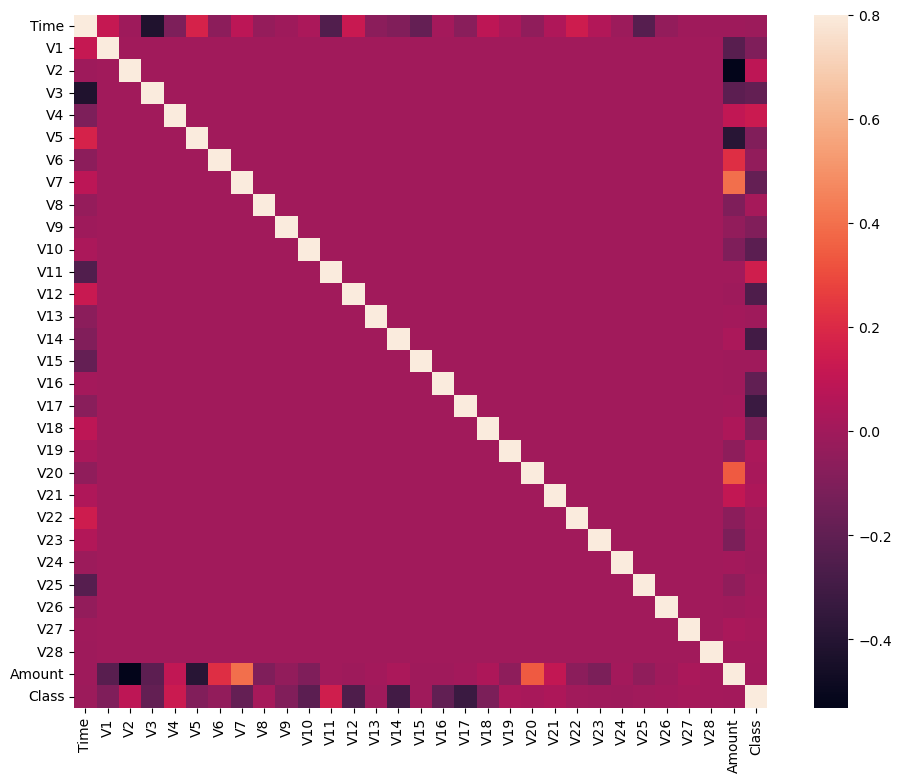

In [26]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [28]:
# In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. for exmple, V2 and V5 are highly negatively correlated with the feature called amount. we also see some correlation with v20 and Amount.This gives us a deeper understanding of the data available to us.

In [29]:
# Code : Separating the X and the Y values
# Dividing the data into inputs parameters and outputs value format

In [30]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [31]:
# Training and Testing Data Bifurcation
# We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [32]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)

In [33]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [34]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is 0.9996137776061234
The precision is 0.9871794871794872
The recall is 0.7857142857142857
The F1-Score is 0.8750000000000001


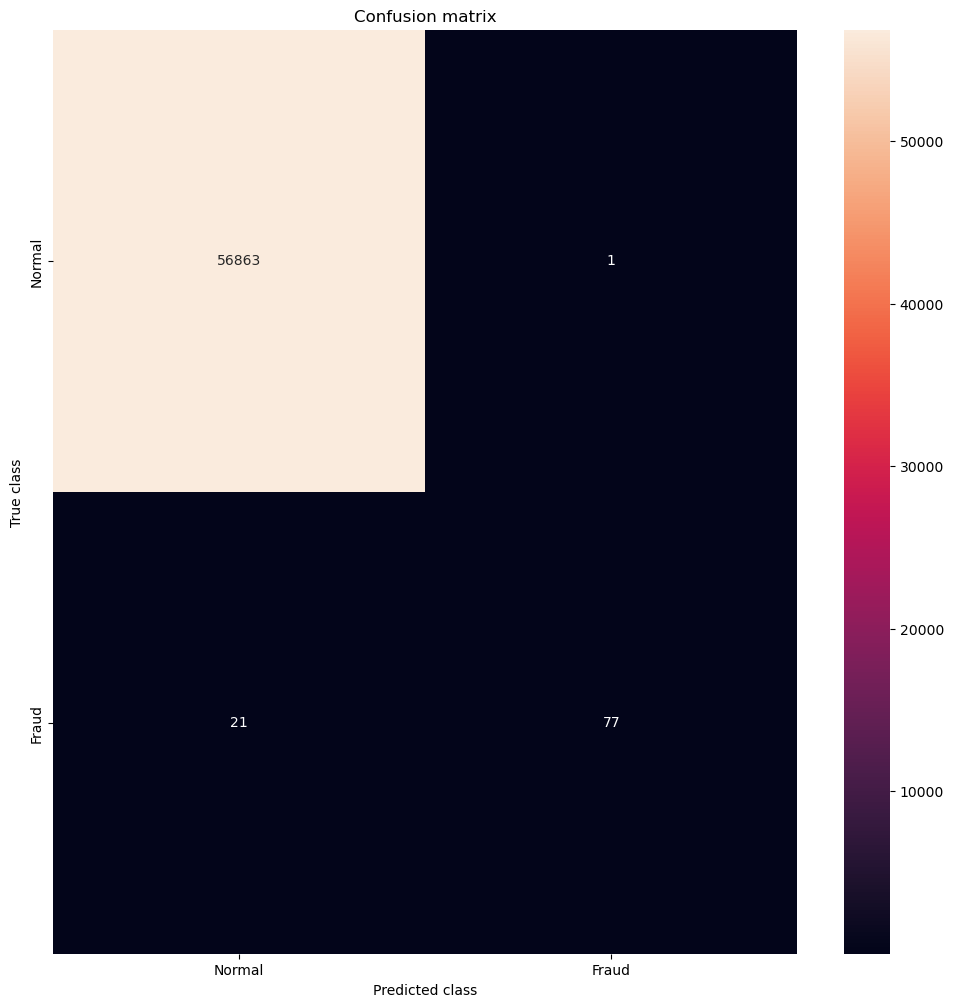

In [35]:
# Visualizing the Confusion Matrix
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [37]:
### Logistic Regression

In [41]:
lm = LogisticRegression(random_state=20, n_jobs=5)
lm.fit(xTrain, yTrain)

LogisticRegression(n_jobs=5, random_state=20)

In [42]:
#Prediction

In [43]:
ypred_train = lm.predict(xTrain)
ypred_test = lm.predict(xTest)

In [44]:
#Confusion Matrix

In [46]:
cm = confusion_matrix(yTest, ypred_test)
cm

array([[56831,    33],
       [   43,    55]], dtype=int64)

<AxesSubplot:>

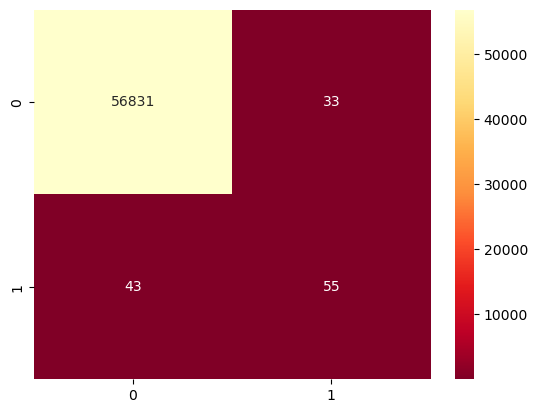

In [47]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

In [48]:
#Accuracy

In [49]:
print("Accuracy of training data:", accuracy_score(yTrain, ypred_train)*100)
ac1 = accuracy_score(yTest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 99.8977374969826
Accuracy of testing data: 99.866577718479


In [50]:
#Classification Report

In [52]:
target_names = ['Class']
print(classification_report(yTest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
#Decision Tree

In [54]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xTrain, yTrain)

DecisionTreeClassifier(random_state=42)

In [55]:
#Prediction

In [56]:
ypred_train = dt.predict(xTrain)
ypred_test = dt.predict(xTest)

In [57]:
#Confusion Matrix

In [58]:
cm = np.array(confusion_matrix(ypred_test, yTest))
cm

array([[56830,    20],
       [   34,    78]], dtype=int64)

<AxesSubplot:>

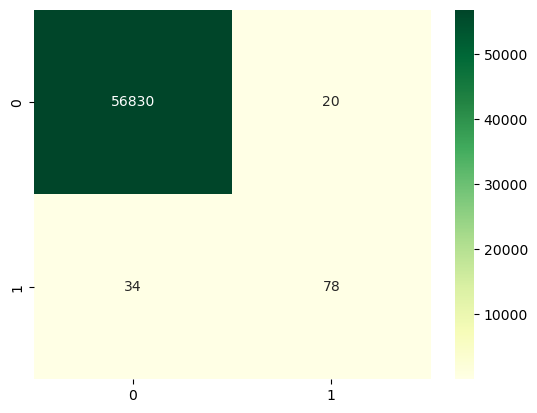

In [59]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

[Text(0.4583333333333333, 0.875, 'X[17] <= -2.769\ngini = 0.003\nsamples = 227845\nvalue = [227451, 394]'), Text(0.25, 0.625, 'X[12] <= -1.925\ngini = 0.352\nsamples = 347\nvalue = [79, 268]'), Text(0.16666666666666666, 0.375, 'X[14] <= -3.43\ngini = 0.299\nsamples = 328\nvalue = [60, 268]'), Text(0.08333333333333333, 0.125, 'gini = 0.227\nsamples = 291\nvalue = [38, 253]'), Text(0.25, 0.125, 'gini = 0.482\nsamples = 37\nvalue = [22, 15]'), Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'), Text(0.6666666666666666, 0.625, 'X[14] <= -8.098\ngini = 0.001\nsamples = 227498\nvalue = [227372, 126]'), Text(0.5, 0.375, 'X[12] <= -3.022\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'), Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'), Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'), Text(0.8333333333333334, 0.375, 'X[14] <= -4.661\ngini = 0.001\nsamples = 227463\nvalue = [227368, 95]'), Text(0.75, 0.125, 'gini = 0.

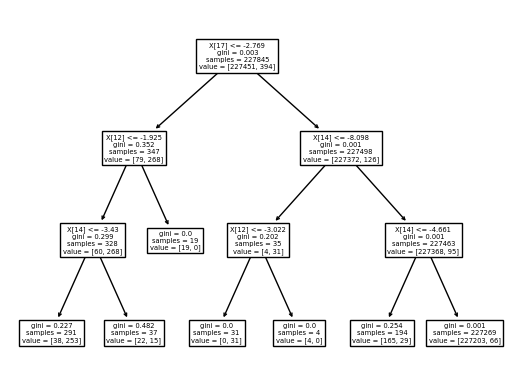

In [60]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(xTrain, yTrain)
print(tree.plot_tree(clf_tree))

In [61]:
#Accuracy

In [62]:
print("Accuracy of training data:", accuracy_score(yTrain, ypred_train)*100)
ac2 = accuracy_score(yTest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 100.0
Accuracy of testing data: 99.90519995786666


In [63]:
# Classification Report

In [65]:
print(classification_report(yTest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [66]:
#KNN Classifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [68]:
#Prediction

In [69]:
ypred_train = knn.predict(xTrain)
ypred_test = knn.predict(xTest)

In [70]:
#Confusion Matrix

In [71]:
cm = np.array(confusion_matrix(ypred_test, yTest))
cm

array([[56864,    89],
       [    0,     9]], dtype=int64)

<AxesSubplot:>

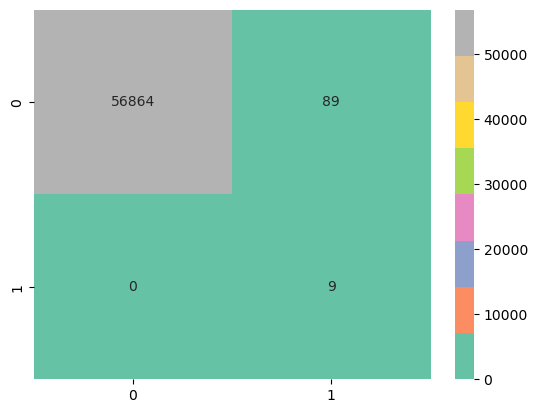

In [72]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set2" ,fmt='g')

In [73]:
#Accuracy

In [74]:
print("Accuracy of training data:", accuracy_score(yTrain, ypred_train)*100)
ac3 = accuracy_score(yTest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 99.86438148741469
Accuracy of testing data: 99.84375548611355


In [75]:
#Classification Report

In [76]:
print(classification_report(yTest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.09      0.17        98

    accuracy                           1.00     56962
   macro avg       1.00      0.55      0.58     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
#Naive Bayes Classifier

In [78]:
#Feature Scaling

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [82]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
gnb = GaussianNB()

In [86]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [87]:
#Prediction

In [88]:
Y_pred = gnb.predict(X_test)

Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
#Accuracy 

In [93]:
print("Accuracy of training data:", accuracy_score(yTrain, ypred_train)*100)
ac4 = accuracy_score(yTest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 99.86438148741469
Accuracy of testing data: 99.84375548611355


In [94]:
#Classification Report

In [95]:
print(classification_report(yTest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.09      0.17        98

    accuracy                           1.00     56962
   macro avg       1.00      0.55      0.58     56962
weighted avg       1.00      1.00      1.00     56962



In [96]:
#SVM

In [97]:
#Feature Scaling

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
dataAttributes = data.drop("Class",axis=1)
dataClasses = data[["Class"]]

In [101]:
x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)

In [102]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [104]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

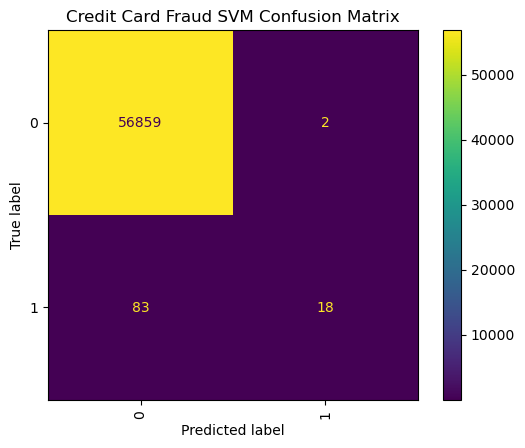

In [105]:
svmClf = svm.SVC(gamma=0.14, C=1, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Credit Card Fraud SVM Confusion Matrix')
plt.show()  

In [106]:
predictedSVM = svmClf.predict(x_test)
reportSVM = classification_report(y_test, predictedSVM, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

,precision,recall,f1-score,support
0,0.998542,0.999965,0.999253,56861.000000
1,0.900000,0.178218,0.297521,101.000000
accuracy,0.998508,0.998508,0.998508,0.998508
macro avg,0.949271,0.589091,0.648387,56962.000000
weighted avg,0.998368,0.998508,0.998009,56962.000000


In [107]:
print("Accuracy of training data:", accuracy_score(yTrain, ypred_train)*100)
ac5 = accuracy_score(yTest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 99.86438148741469
Accuracy of testing data: 99.84375548611355


In [108]:
###Performance Comparison

In [109]:
accuracy =  {ac1: 'Logistic Regression', ac2:'Decission Tree', ac3:'kNN', ac4: 'Naive_bayes',ac5:'SVM'}

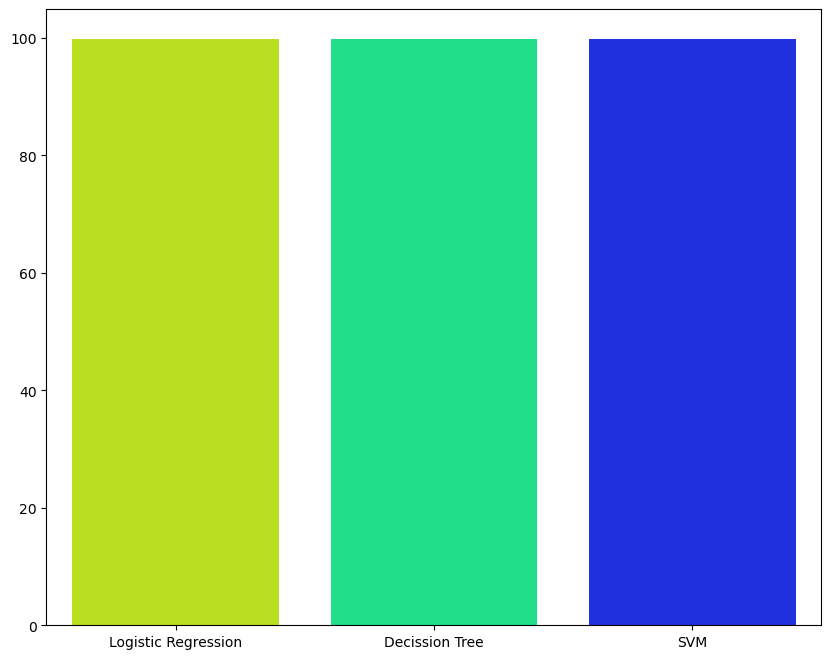

In [110]:
plt.figure(figsize=(10, 8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

In [111]:
#AdaBoost Classifier

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
adb_clf = AdaBoostClassifier()

In [114]:
adb_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [115]:
y_pred = adb_clf.predict(x_test)

In [116]:
confusion_matrix(y_test, y_pred)

array([[56848,    13],
       [   32,    69]], dtype=int64)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.68      0.75       101

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [118]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9992099996488887

In [119]:
ac2=accuracy_score(y_test, y_pred)*100

In [122]:
print("Accuracy of testing data:", ac2)

Accuracy of testing data: 99.92099996488886


In [121]:
#XGBoost Classifier

In [123]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 1.7 MB/s eta 0:00:00


In [124]:
import xgboost as xgb

In [125]:
xgb_clf = xgb.XGBClassifier()

In [126]:
y_train_mod = y_train
y_test_mod = y_test

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_mod = le.fit_transform(y_train)

In [128]:
xgb_clf.fit(x_train, y_train_mod)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
y_pred = xgb_clf.predict(x_test)

In [130]:
y_test_mod=le.fit_transform(y_test)

In [131]:
confusion_matrix(y_test_mod , y_pred)

array([[56856,     5],
       [   19,    82]], dtype=int64)

In [132]:
print(classification_report(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.81      0.87       101

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [133]:
accuracy_score(y_true = y_test_mod, y_pred = y_pred)

0.9995786664794073

In [134]:
ac3=accuracy_score(y_test_mod, y_pred)*100

In [135]:
print("Accuracy of test dataset:",ac3)

Accuracy of test dataset: 99.95786664794073


In [136]:
#Performance Comparison 

In [137]:
import seaborn as sns

In [138]:
accuracy =  {ac1: 'Random forest', ac2: 'Adaboost', ac3: 'XGboost'}

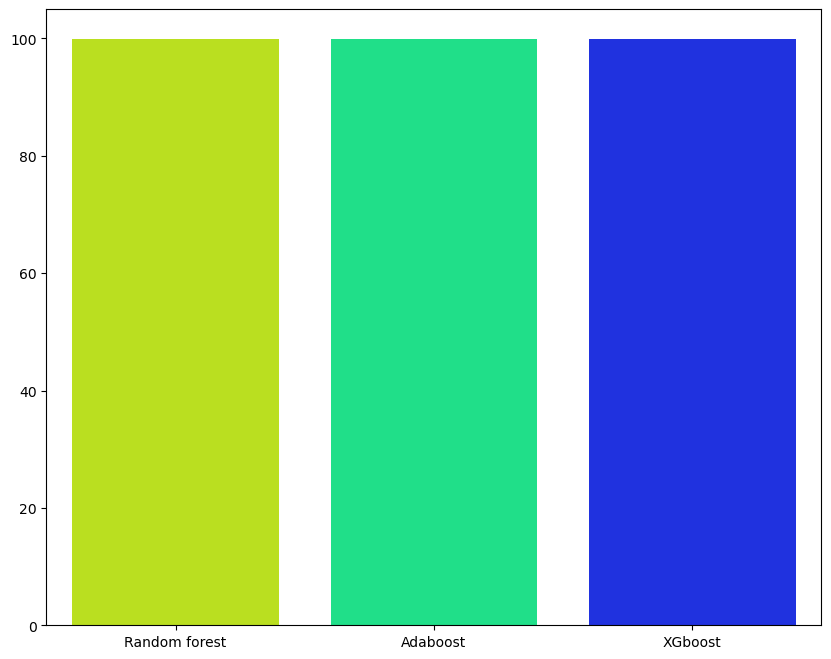

In [139]:
plt.figure(figsize=(10,8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');